## 실습 평가 과제



In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from scipy.stats import norm

#### 과제 1.
아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

Q2. df를 수정하여 3가지 이상의 인사이트를 포함한 데이터셋으로 변환 후 데이터셋을 data_gen.csv 파일 로 저장하세요.




In [ ]:
df = pd.pandas.read_csv('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/data_gen.csv')

#### 과제2
data_gen.csv 파일을 불러와서 데이터셋에 대한 통계적 탐색을 수행하고 아래 예시를 참조하여 분석용 데이터셋으로서 가치를 제고하기 위한 수정작업을 하신 후 데이터셋이 포함하고 있는 특징 및 인사이트를 정리하여 기술하고 그 결과 파일을 data_rev.csv 이름으로 저장하세요.

(예시) 분석용 데이터셋 가치를 제고하기 위하여 통계적 분석 기법을 이용하여 데이터셋에 대하여 다음 인사이트가 반영되도록 데이터셋을 수정하세요.
- 가격, 구매 수량에 10개의 결측치 반영
- 가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정
- 성별에 따른 구매 구액의 분포에 이상치가 포함되지 않도록 수정

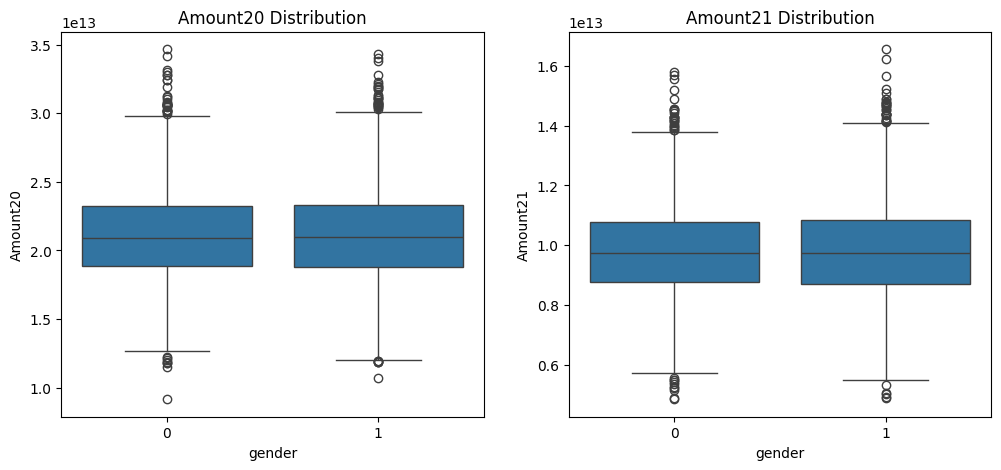

In [ ]:
# 성별에 따른 구매 금액의 분포 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='amount_20', data=df)
plt.ylabel('Amount20')
plt.title('Amount20 Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='gender', y='amount_21', data=df)
plt.ylabel('Amount21')
plt.title('Amount21 Distribution')
plt.show()

In [ ]:
# 연도별 가격, 구매 수량, 구매 금액(매출)을 정규분포에 근사하도록 수정

np.random.seed(0)

price_20_iqr = df['price_20'].quantile(0.75) - df['price_20'].quantile(0.55)
price_21_iqr = df['price_21'].quantile(0.75) - df['price_21'].quantile(0.55)
quantity_20_iqr = df['quantity_20'].quantile(0.75) - df['quantity_20'].quantile(0.55)
quantity_21_iqr = df['quantity_21'].quantile(0.75) - df['quantity_21'].quantile(0.55)

# price_20, price_21을 정규분포로 변환
df['price_20'] = np.random.normal(df['price_20'].quantile(0.75), price_20_iqr, len(df))
df['price_21'] = np.random.normal(df['price_21'].quantile(0.75), price_21_iqr, len(df))

# quantity_20, quantity_21을 정규분포로 변환
df['quantity_20'] = np.random.normal(df['quantity_20'].quantile(0.75), quantity_20_iqr, len(df))
df['quantity_21'] = np.random.normal(df['quantity_21'].quantile(0.75), quantity_21_iqr, len(df))

# 변환된 값 amount20, amount_21에 적용
df['amount_20'] = df['price_20'] * df['quantity_20']
df['amount_21'] = df['price_21'] * df['quantity_21']

<function matplotlib.pyplot.show(close=None, block=None)>

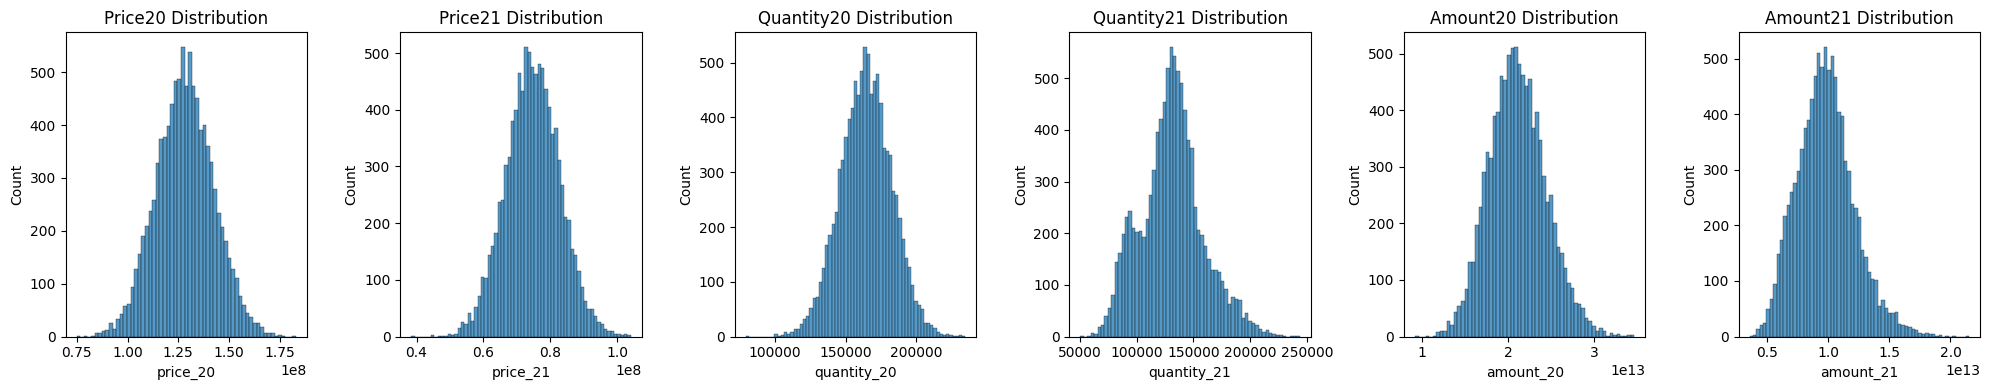

In [ ]:
# 연도별 가격, 구매 수량, 구매 금액 분포 시각화
fig, axes = plt.subplots(1,6,figsize=(20,4))
sns.histplot(df['price_20'],ax=axes[0])
axes[0].set_title('Price20 Distribution')

sns.histplot(df['price_21'],ax=axes[1])
axes[1].set_title('Price21 Distribution')

sns.histplot(df['quantity_20'],ax=axes[2])
axes[2].set_title('Quantity20 Distribution')

sns.histplot(df['quantity_21'],ax=axes[3])
axes[3].set_title('Quantity21 Distribution')

sns.histplot(df['amount_20'],ax=axes[4])
axes[4].set_title('Amount20 Distribution')

sns.histplot(df['amount_21'],ax=axes[5])
axes[5].set_title('Amount21 Distribution')
plt.tight_layout()
plt.show

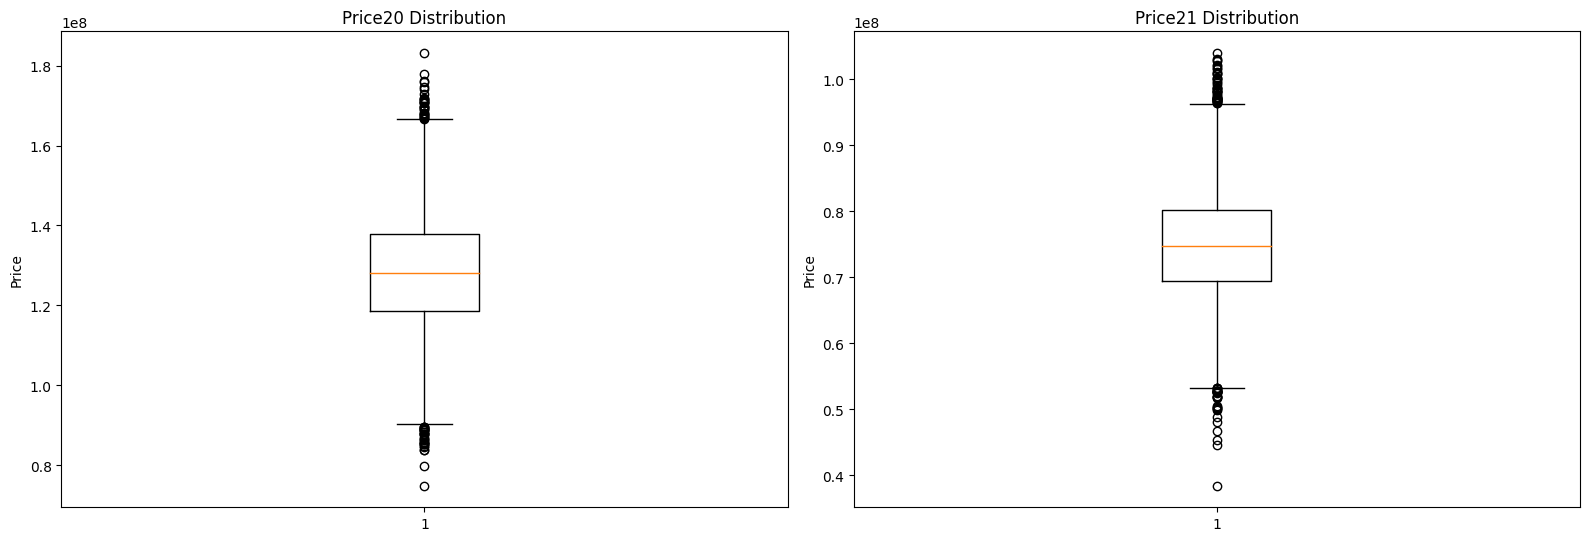

In [ ]:
# price_20과 price_21의 boxplot 그리기
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].boxplot(df['price_20'])
axes[0].set_ylabel('Price')
axes[0].set_title('Price20 Distribution')

axes[1].boxplot(df['price_21'])
axes[1].set_ylabel('Price')
axes[1].set_title('Price21 Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# 이상치 탐색 및 수정

df['amount_20'].agg(['max', 'min'])
df['amount_21'].agg(['max', 'min'])


max    2.152048e+13
min    3.534066e+12
Name: amount_21, dtype: float64

In [ ]:
# price_20에 결측치 추가
df.loc[df['price_20'].sample(n=10, random_state=0).index, 'price_20'] = np.nan

# 결측치 확인
# 데이터 값이 null인 데이터만 출력
null_data = df[df.isnull().any(axis=1)]

In [ ]:
df.to_csv('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/data_rev.csv', index=False)

#### 과제3.
Q1. data_rev.csv를 불러와서 추가적으로 의미있는 3개의 인사이트를 반영한 후 탐색적 분석을 통하여 그 내용을 통계적 시각적으로 도출하고 인사이트가 반영되었는지 여부를 기술하시고 data_analysis.csv로 저장하세요.

Q2. data_analysis.csv를 기반으로 아래 예시를 참조하여 새로운 분석 과제를 정의한 후 그 과제에 적합한 분석용 데이터셋을 만든 후 과제에 적합한 이유 및 특징을 기술하고 data_obj.csv로 저장하세요.

(예시)고객별 구매감소 원인을 파악하기 위한 분석형 데이터셋을 생성한 후 탐색적 분석을 수행.(거래기준 데이터 -> 고객기준 데이터로 변환)

In [ ]:
data = pd.pandas.read_csv('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/data_rev.csv')

In [ ]:
# 결측치 확인 및 데이터 처리
#df.isnull().sum()
df = data.drop(columns=['age_group', 'date', 'day', 'time_20', 'time_21'])

#df.info()

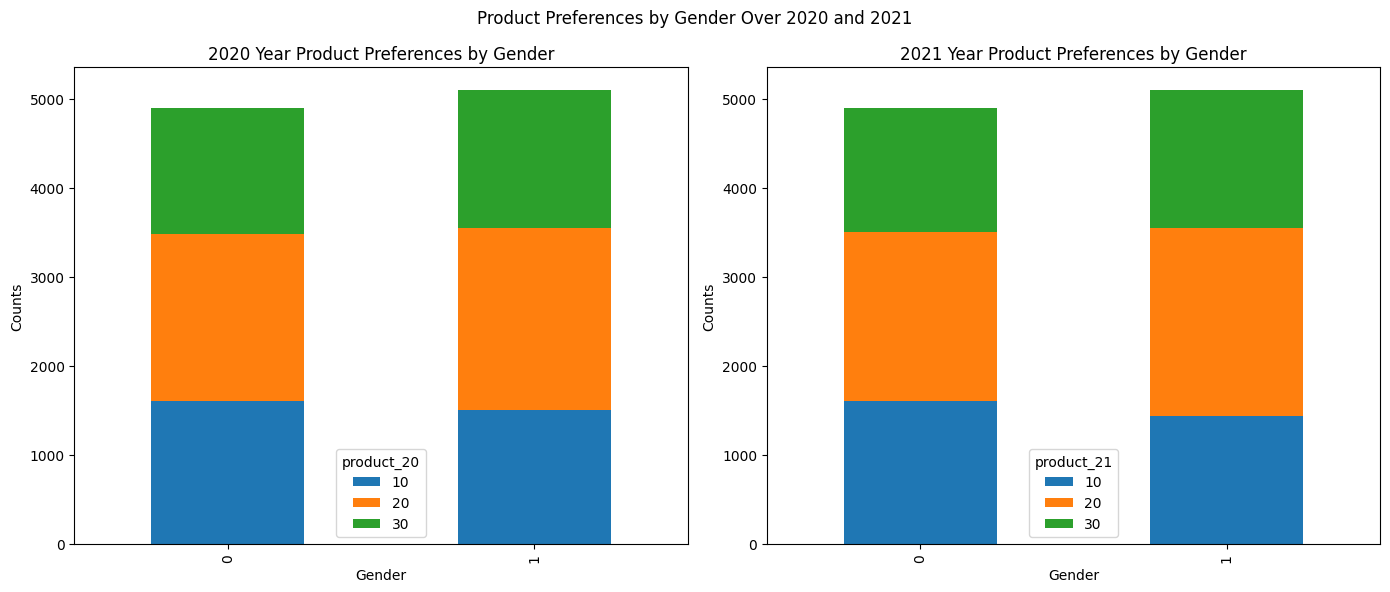

In [ ]:
# 남녀별 20년도, 21년도 선호 product 시각화

df_product20 = df.groupby(['gender', 'product_20']).size().unstack()
df_product21 = df.groupby(['gender', 'product_21']).size().unstack()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 2020년 데이터 그래프
df_product20.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('2020 Year Product Preferences by Gender')
axes[0].set_ylabel('Counts')
axes[0].set_xlabel('Gender')

# 2021년 데이터 그래프
df_product21.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('2021 Year Product Preferences by Gender')
axes[1].set_ylabel('Counts')
axes[1].set_xlabel('Gender')

# 전체 그래프 타이틀 및 보여주기 설정
plt.suptitle('Product Preferences by Gender Over 2020 and 2021')
plt.tight_layout()
plt.show()

In [ ]:
# 인사이트 1. 일부 남성 고객 => 여성 고객으로 수정

#print(df['gender'].value_counts(), '\n')
cond = (df['cusno'] <= 1150) & (df['gender'] == 0)
df.loc[cond, 'gender'] = 1
#df['gender'].value_counts()

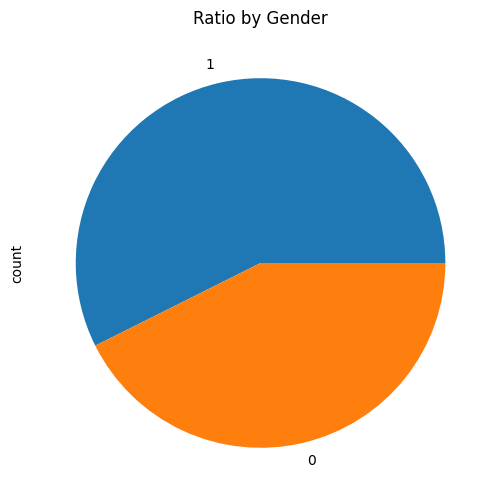

In [ ]:
# 남녀 고객 비율 시각화
df['gender'].value_counts().plot(kind='pie', figsize=(6, 6))
plt.title('Ratio by Gender')
plt.show()

In [ ]:
region = df['region'] == 3
cond = region & (df['product_21'] == 10)
print(df[cond][['region', 'product_21', 'quantity_21', 'amount_21']].head())
#df.loc[cond, 'quantity_21']

#df.loc[region]

     region  product_21    quantity_21     amount_21
439       3          10  172003.039871  1.418167e+13
440       3          10  173256.920915  1.499375e+13
441       3          10  184949.809913  1.283154e+13
442       3          10  197302.687952  1.413358e+13
443       3          10  188428.023418  1.563065e+13


In [ ]:
# 인사이트 2. 20년도 대비 21년도 3지역 상품별 매출액 변화
# 고가품 구매량 30% 증가
region = df['region'] == 3
cond = region & (df['product_21'] == 10)

# 3지역 고가품 매출 상승
df.loc[cond, 'quantity_21'] *= 1.3
df.loc[region, 'amount_21'] = df.loc[region, 'price_21'] * df.loc[region, 'quantity_21']

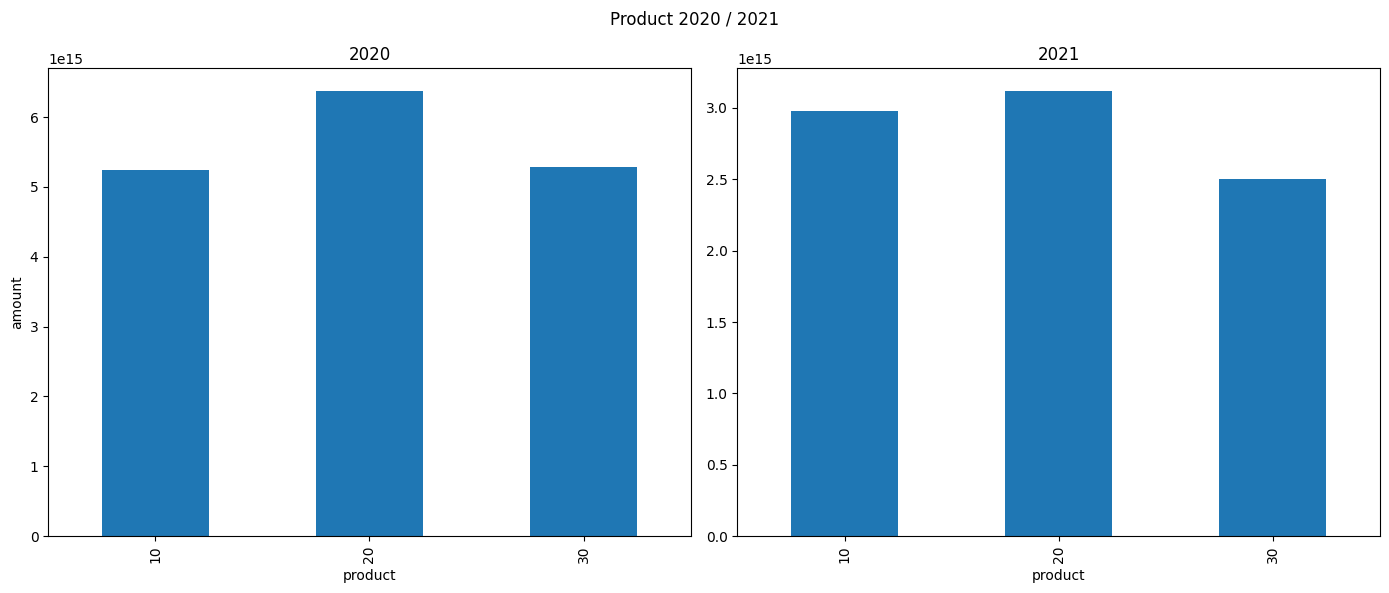

In [ ]:
# 3지역 상품별 매출액 변화 시각화

# 각 상품별 매출액 집계
df_product20 = df[region].groupby('product_20')['amount_20'].sum()
df_product21 = df[region].groupby('product_21')['amount_21'].sum()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 2020년 데이터 그래프
df_product20.plot(kind='bar', ax=axes[0], stacked=True)
axes[0].set_title('2020')
axes[0].set_ylabel('amount')
axes[0].set_xlabel('product')

# 2021년 데이터 그래프
df_product21.plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title('2021')
axes[1].set_xlabel('product')

plt.suptitle('Product 2020 / 2021')
plt.tight_layout()
plt.show()

# 제 3지역의 고가품 매출액이 21년도에 증가한 것을 알 수 있습니다.
# 고가품의 매출은 증가했으나 다른 상품들에 대한 매출은 유지하고 있습니다.
# 3지역 거주민들의 고가품 소비량만이 증가한 것으로 보아 일상생활은 유지하되 사치품의 구매가 증가했습니다.
# 3지역 거주민들의 소득수준이 전체적으로 증가한 것으로 보입니다.

In [ ]:
# 인사이트 3. 여성의 고가품 매출이 30% 증가 저가품 매출은 20% 하락

# 여성들의 21년도 고가품, 저가품 매출 변동
cond = (df['gender'] == 1)
cond1 = cond & (df['product_21'] == 10) # 고가품
cond2 = cond & (df['product_21'] == 30) # 저가품

# 고가품 30% 증가, 저가품 30% 하락
df.loc[cond1, 'quantity_21'] *= 1.3
df.loc[cond2, 'quantity_21'] *= 0.7

# 매출액 반영
df.loc[cond1, 'amount_21'] = df.loc[cond1, 'price_21'] * df.loc[cond1, 'quantity_21']
df.loc[cond2, 'amount_21'] = df.loc[cond2, 'price_21'] * df.loc[cond2, 'quantity_21']

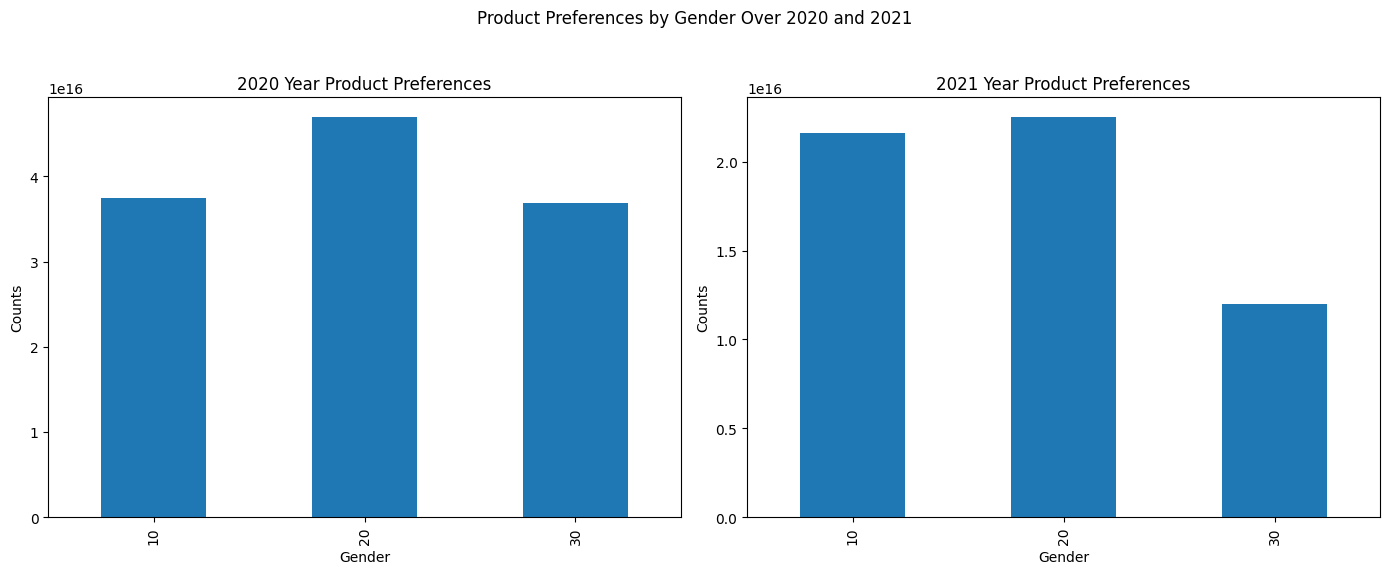

In [ ]:
# 여성들의 20년 21년 상품 선호도 변화 시각화

df_product20 = df.loc[cond].groupby('product_20')['amount_20'].sum()
df_product21 = df.loc[cond].groupby('product_21')['amount_21'].sum()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 2020년 데이터 그래프
df_product20.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('2020')
axes[0].set_ylabel('Amount')
axes[0].set_xlabel('Product')

# 2021년 데이터 그래프
df_product21.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('2021')
axes[1].set_ylabel('Amount')
axes[1].set_xlabel('Product')

plt.suptitle('Product 2020 / 2021')
plt.tight_layout()
plt.show()

# 여성 고객들의 수가 증가했고, 여성 고객들의 구매 선호 상품이 저가품목에서 고가품목으로 변화한 것으로 보아
# 기혼 여성 대비 미혼 여성의 수가 증가했으며, 여성들의 관심사가 생활 품목에서 다른 분야로 옮겨갔음을
# 확인할 수 있습니다. 아직은 미혼 남성들의 선호 상품이 저가품에서 고가품까지 고루 분포되어있으나
# 앞으로 어느 방향으로 관심사가 몰릴지 확인해야합니다.

In [ ]:
df['age_group'] = df['age'] // 10
df.groupby('gender')['age_group'].value_counts().sort_index()

gender  age_group
0       1             548
        2             669
        3             824
        4             490
        5             525
        6             606
        7             548
        8              52
1       1             275
        2             955
        3            1059
        4            1205
        5            1065
        6             649
        7             484
        8              46
Name: count, dtype: int64

In [ ]:
# 인사이트 4. age_group별 고객 수 재구성
# 10대 고객 수 약 30%로 축소, 20대 고객 수 유지, 30-50대 고객 수 두배

# age_group 데이터셋 재구성
df['age_group'] = df['age'] // 10
fe = df['gender'] == 1

# 10대 여성 고객의 나이를 30~50대로 변경
cond = (df['cusno'] < 1600) & (df['age_group'] == 1) & fe
df.loc[cond, 'age'] = np.random.randint(30,60, size=len(df.loc[cond]))

# 60대 여성 고객의 나이를 25-30대로 변경
cond60 = (df['cusno'] < 1150) & (df['age'] >= 60) & (df['age'] < 66) & fe
df.loc[cond60, 'age'] = np.random.randint(25,40, size=len(df.loc[cond60]))

# 70대 여성 고객의 나이를 40-54로 변경
cond70 = (df['cusno'] < 1300) & (df['age_group'] == 7) & fe
df.loc[cond70, 'age'] = np.random.randint(40,55, size=len(df.loc[cond70]))

In [ ]:
df.to_csv('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/data_analysis.csv', index=False)

Q2. data_analysis.csv를 기반으로 아래 예시를 참조하여 새로운 분석 과제를 정의한 후 그 과제에 적합한 분석용 데이터셋을 만든 후 과제에 적합한 이유 및 특징을 기술하고 data_obj.csv로 저장하세요.

(예시)고객별 구매감소 원인을 파악하기 위한 분석형 데이터셋을 생성한 후 탐색적 분석을 수행.(거래기준 데이터 -> 고객기준 데이터로 변환)

### 여성 고객들의 저가 상품 구매 감소 및 고가 상품 구매 증가 원인 파악

### 여성 고객 분석용 데이터셋

In [37]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from scipy.stats import norm

data = pd.pandas.read_csv('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/data_analysis.csv')

# 여성 고객 데이터만 분류
df = data[data['gender'] == 1]

# 사용하지 않는 컬럼 제거
df.drop(columns=['gender', 'trans_id', 'year', 'month', 'quarter'], inplace=True)

# age_group 생성 1~7
df['age_group'].value_counts().sort_index()

# married 컬럼 추가 기혼:1 미혼:0
# age_group == 1은 무조건 미혼
df.loc[df['age_group'] >= 2, 'married'] = np.random.choice([1,0], size=len(df.loc[df['age_group'] >= 2]), p=[0.4, 0.6])
df.loc[df['age_group'] == 1, 'married'] = 0

# 기혼 고객 product_20, product_21 30이 40%, 20이 30%, 10이 20%
df.loc[df['married'] == 1, 'product_20'] = np.random.choice([10,20,30], size=len(df.loc[df['married'] == 1]), p=[0.15, 0.3, 0.55])
df.loc[df['married'] == 1, 'product_21'] = np.random.choice([10,20,30], size=len(df.loc[df['married'] == 1]), p=[0.2, 0.3, 0.5])

# 미혼고객 product_20, product_21 30이 20%, 20이 30%, 10이 40%
c = (df['married'] == 0) & (df['age_group'] > 1)
df.loc[c, 'product_20'] = np.random.choice([10,20,30], size=len(df.loc[c]), p=[0.1, 0.3, 0.6])
df.loc[c, 'product_21'] = np.random.choice([10,20,30], size=len(df.loc[c]), p=[0.6, 0.3, 0.1])

# product 컬럼 값이 10이면 price 값 35000~50000의 실수 난수로 변경
# amount 수정
product20_10 = df['product_20'] == 10
df.loc[product20_10, 'price_20'] = np.random.uniform(35000, 50001, size=len(df.loc[product20_10]))
df.loc[product20_10, 'amount_20'] = df.loc[product20_10, 'price_20'] * df.loc[product20_10, 'quantity_20']
product21_10 = df['product_21'] == 10
df.loc[product21_10, 'price_20'] = np.random.uniform(35000, 50001, size=len(df.loc[product21_10]))
df.loc[product21_10, 'amount_21'] = df.loc[product21_10, 'price_21'] * df.loc[product21_10, 'quantity_21']

# product 컬럼 값이 20이면 15000에서 35000 미만의 실수 난수로 변경
product20_20 = df['product_20'] == 20
df.loc[product20_20, 'price_20'] = np.random.uniform(15000, 35000, size=len(df.loc[product20_20]))
df.loc[product20_20, 'amount_20'] = df.loc[product20_20, 'price_20'] * df.loc[product20_20, 'quantity_20']
product21_20 = df['product_21'] == 20
df.loc[product21_20, 'price_20'] = np.random.uniform(35000, 50001, size=len(df.loc[product21_20]))
df.loc[product21_20, 'amount_21'] = df.loc[product21_20, 'price_21'] * df.loc[product21_20, 'quantity_21']

#product 컬럼 값이 30이면 1000에서 15000 미만의 실수 난수로 변경
product20_30 = df['product_20'] == 30
df.loc[product20_30, 'price_20'] = np.random.uniform(1000, 15000, size=len(df.loc[product20_30]))
df.loc[product20_30, 'amount_20'] = df.loc[product20_30, 'price_20'] * df.loc[product20_30, 'quantity_20']
product21_30 = df['product_21'] == 30
df.loc[product21_30, 'price_20'] = np.random.uniform(35000, 50001, size=len(df.loc[product21_30]))
df.loc[product21_30, 'amount_21'] = df.loc[product21_30, 'price_21'] * df.loc[product21_30, 'quantity_21']

<ipython-input-37-97cc64c19257>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['gender', 'trans_id', 'year', 'month', 'quarter'], inplace=True)
<ipython-input-37-97cc64c19257>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['age_group'] >= 2, 'married'] = np.random.choice([1,0], size=len(df.loc[df['age_group'] >= 2]), p=[0.4, 0.6])


### 여성 고객 상품별 구매량 변화 시각화

1. 기혼인 여성 고객보다 미혼인 여성 고객의 수가 더 많아지면서 여성 고객들의 관심사가 중,저가의 가성비 있는 생활용품 위주 소비에서 고가의 품목 소비로 옮겨갔을 것이라고 생각할 수 있습니다.

2. 여성 고객들의 연령 분포 그래프로 연령별 기혼 미혼 그래프를 살펴보면 20~50대의 미혼 여성 수가 기혼 여성의 수보다 높은 것을 알 수 있습니다.

3. 결과적으로 여성 20~50대 주 소비층 고객들의 관심사가 중, 저가품(그 중에서도 중간가격의 상품)에서 고가품으로 옮겨가며 소비량이 달라진 것으로 파악됩니다.

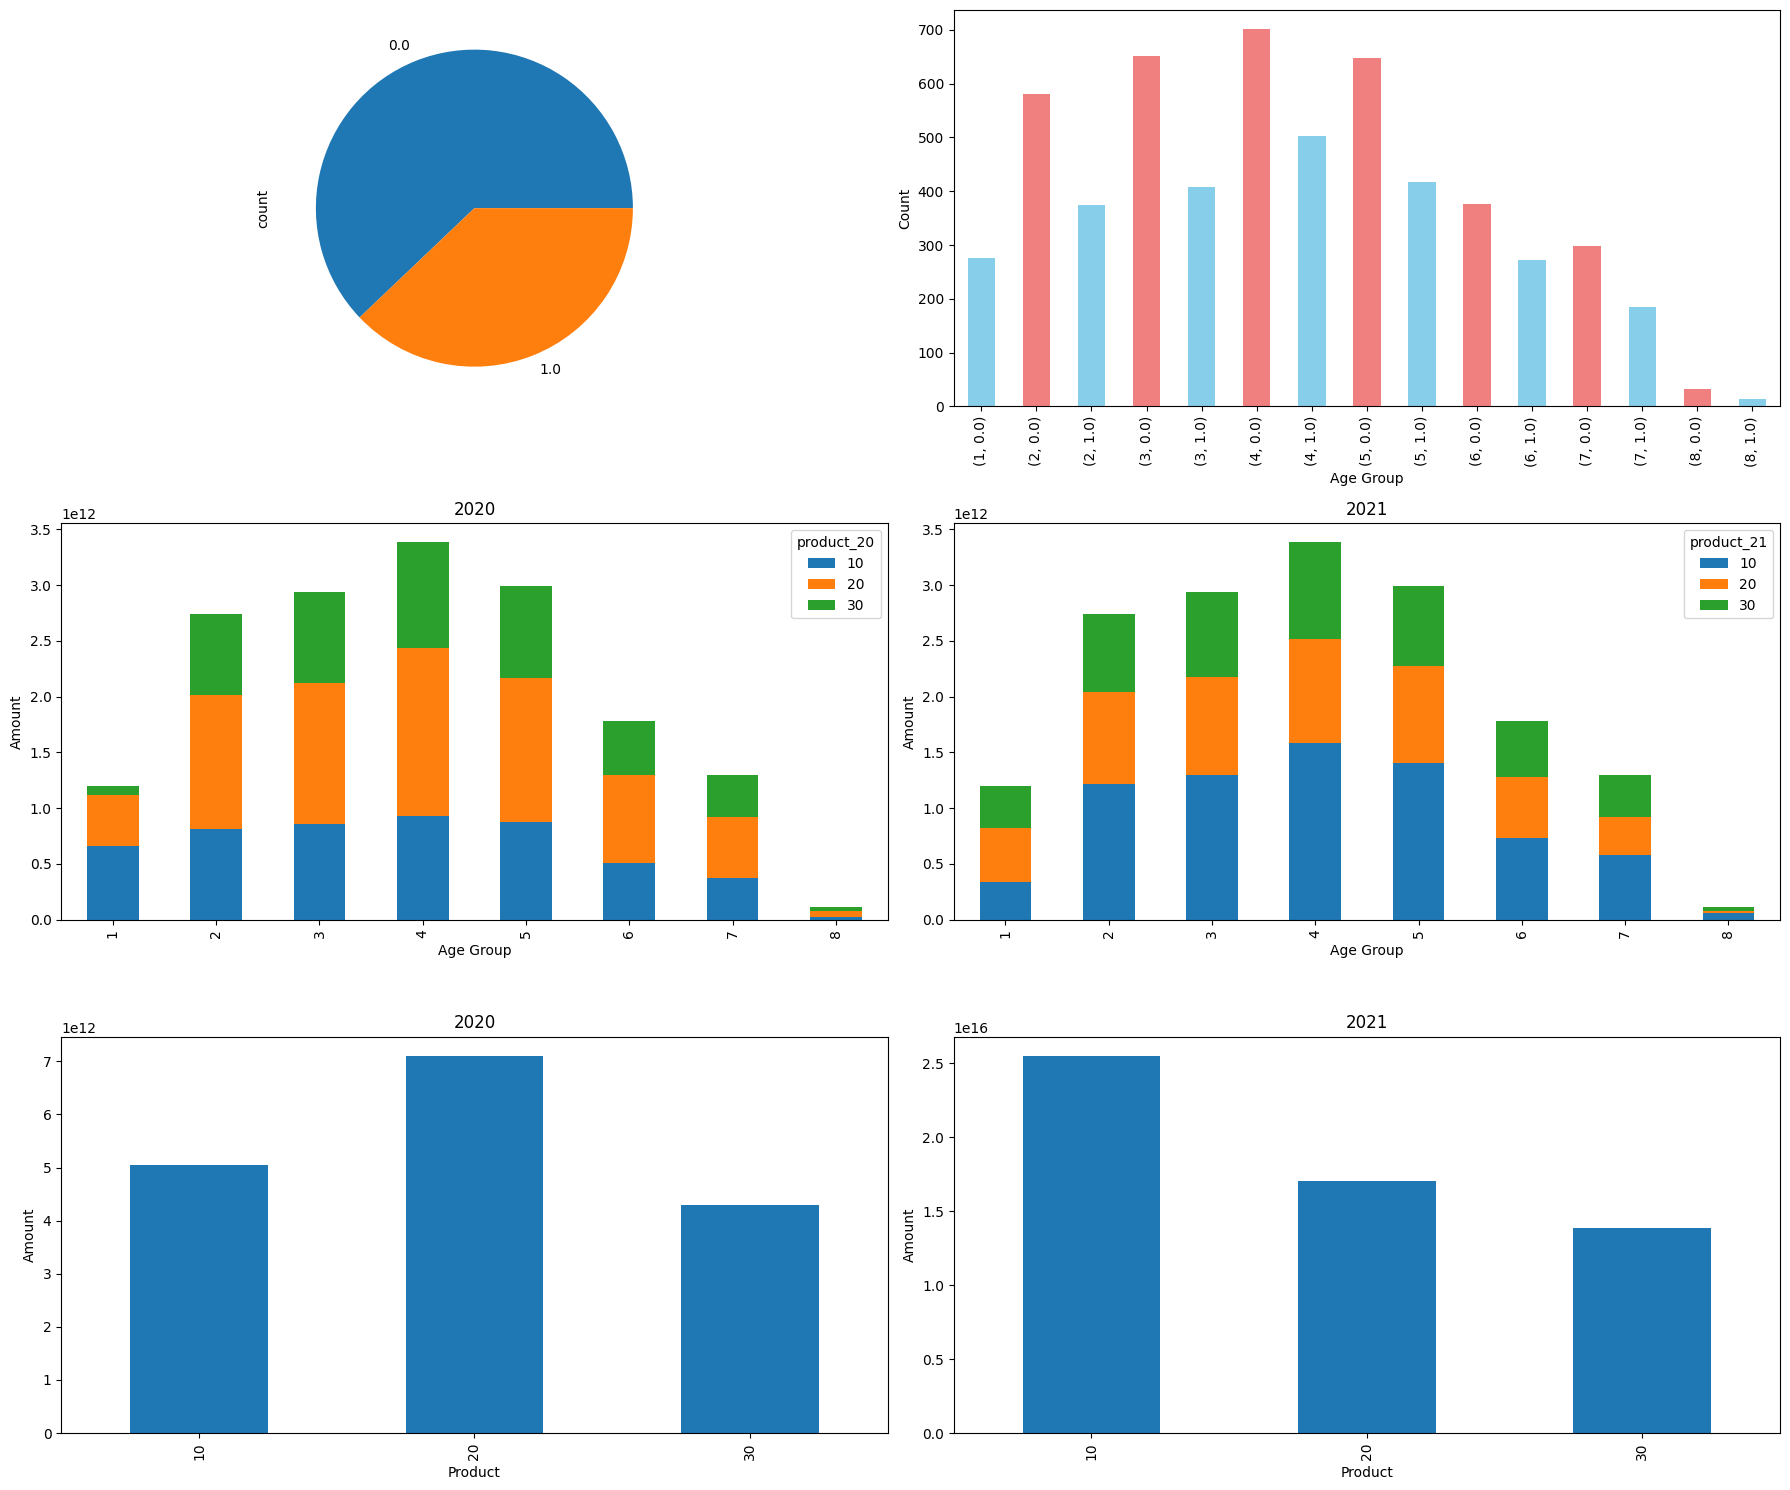

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))

# 기혼 미혼 pie 그래프
df['married'].value_counts().plot(kind='pie', ax=axes[0,0])
plt.title('Married or Not')

# 고객들의 연령별 기혼 미혼 분포 막대 그래프
df.groupby('age_group')['married'].value_counts().plot(kind='bar', ax=axes[0,1], color=['skyblue','lightcoral'])
axes[0,1].set_xlabel('Age Group')
axes[0,1].set_ylabel('Count')

# 연령별 상품별 구매량 그래프
df_product20 = df.groupby(['age_group', 'product_20'])['amount_20'].sum()
df_product21 = df.groupby(['age_group', 'product_21'])['amount_20'].sum()
df_product20 = df_product20.unstack()
df_product21 = df_product21.unstack()

df_product20.plot(kind='bar', stacked=True, ax=axes[1,0], title='Vertical Stack Bar Plot')
axes[1,0].set_title('2020')
axes[1,0].set_ylabel('Amount')
axes[1,0].set_xlabel('Age Group')

df_product21.plot(kind='bar', stacked=True, ax=axes[1,1], title='Horizontal Stack Bar Plot')
axes[1,1].set_title('2021')
axes[1,1].set_ylabel('Amount')
axes[1,1].set_xlabel('Age Group')

# 여성들의 상품별 구매량 그래프
df_product20 = df.groupby('product_20')['amount_20'].sum()
df_product21 = df.groupby('product_21')['amount_21'].sum()

# 2020년 데이터 그래프
df_product20.plot(kind='bar', stacked=True, ax=axes[2,0])
axes[2,0].set_title('2020')
axes[2,0].set_ylabel('Amount')
axes[2,0].set_xlabel('Product')

# 2021년 데이터 그래프
df_product21.plot(kind='bar', stacked=True, ax=axes[2,1])
axes[2,1].set_title('2021')
axes[2,1].set_ylabel('Amount')
axes[2,1].set_xlabel('Product')

plt.tight_layout()
plt.show()

In [39]:
df.to_csv('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/data_obj.csv', index=False)